This notebook is for further investigation into dates/times.

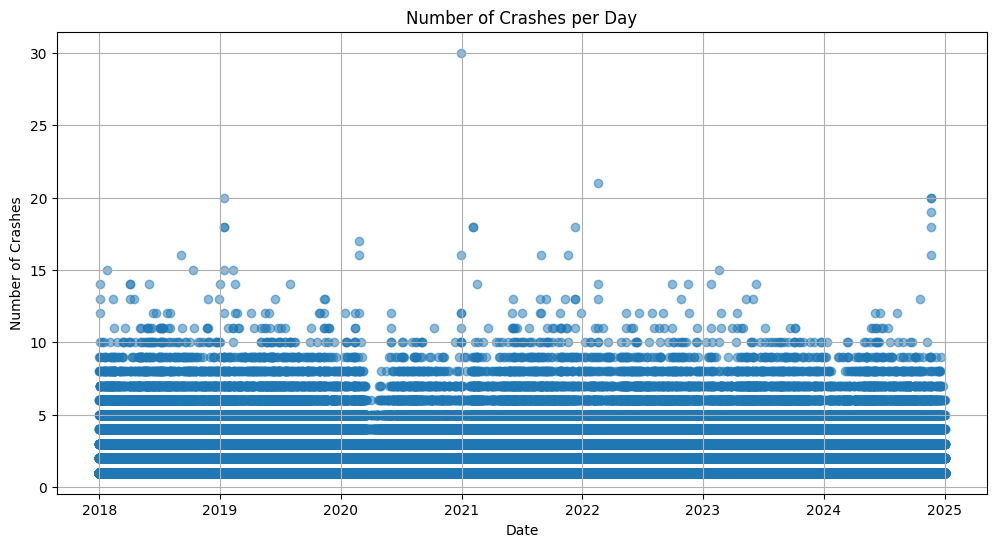

,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION,CRASH_YEAR,CRASH_DAY_OF_WEEK_NAME
0,23a79931ef555d54118f64dc9be2cf2dbf59636ce253f7...,NaN,2023-09-05 19:05:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DUSK,ANGLE,"FIVE POINT, OR MORE",...,2.0,0.0,19,3,9,NaN,NaN,NaN,2023,Tuesday
1,2675c13fd0f474d730a5b780968b3cafc7c12d7adb661f...,NaN,2023-09-22 18:45:00,50,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,...,2.0,0.0,18,6,9,NaN,NaN,NaN,2023,Friday
2,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,NaN,2023-07-29 14:45:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),...,1.0,0.0,14,7,7,41.85412,-87.665902,POINT (-87.665902342962 41.854120262952),2023,Saturday
3,7ebf015016f83d09b321afd671a836d6b148330535d5df...,NaN,2023-08-09 23:00:00,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,NOT DIVIDED,...,2.0,0.0,23,4,8,NaN,NaN,NaN,2023,Wednesday
4,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,NaN,2023-08-18 12:50:00,15,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,...,1.0,0.0,12,6,8,NaN,NaN,NaN,2023,Friday


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

#Scatterplot showing number of accidents per day 
df_interim = pd.read_csv("C:/Users/chris/Documents/Senior_Project/CT_SeniorProject/CrashData_Repo1/data/interim/filtered_dataset.csv")
df_interim['CRASH_DATE'] = pd.to_datetime(df_interim['CRASH_DATE'])

# Group by 'CRASH_DATE' and count the number of crashes per day
crashes_per_day = df_interim.groupby('CRASH_DATE').size().reset_index(name='CRASH_COUNT')

# Create the scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(crashes_per_day['CRASH_DATE'], crashes_per_day['CRASH_COUNT'], alpha=0.5)
plt.title('Number of Crashes per Day')
plt.xlabel('Date')
plt.ylabel('Number of Crashes')
plt.grid(True)
plt.show()


df_interim.head()

This graph shows the number of crashes each day since 2018. The graph looks almost uniform, at the 10 crash count. We can see a dip in crashes in early 2020, presumably due to COVID lockdown. There is also a maximum value around January 2021 that we should investigate. 

What is the average number of crashes per day? Per year? What are the maximum and minimum values overall? What are the maximum and minimum values for each year?

In [6]:
# What is the average number of accidents per day?
average_crashes_per_day = crashes_per_day['CRASH_COUNT'].mean()

# What is the median number of accidents per day?
median_crashes_per_day = crashes_per_day['CRASH_COUNT'].median()

# What is the maximum number of accidents in a single day?
max_crashes_per_day = crashes_per_day['CRASH_COUNT'].max()
#Return the date with the maximum number of accidents
max_crashes_date = crashes_per_day[crashes_per_day['CRASH_COUNT'] == max_crashes_per_day]['CRASH_DATE'].values[0]

# What is the minimum number of accidents in a single day?
min_crashes_per_day = crashes_per_day['CRASH_COUNT'].min()

#Return the date with the minimum number of accidents
min_crashes_date = crashes_per_day[crashes_per_day['CRASH_COUNT'] == min_crashes_per_day]['CRASH_DATE'].values[0]

# What is the average number of accidents for each year?
crashes_per_year = df_interim.groupby(df_interim['CRASH_DATE'].dt.year).size().reset_index(name='CRASH_COUNT')

# What is the maximum number of accidents for each year?
max_crashes_per_year = crashes_per_year['CRASH_COUNT'].max()

#Return the year with the maximum number of accidents
max_crashes_year = crashes_per_year[crashes_per_year['CRASH_COUNT'] == max_crashes_per_year]['CRASH_DATE'].values[0]

# What is the minimum number of accidents for each year?
min_crashes_per_year = crashes_per_year['CRASH_COUNT'].min()

#Return the year with the minimum number of accidents
min_crashes_year = crashes_per_year[crashes_per_year['CRASH_COUNT'] == min_crashes_per_year]['CRASH_DATE'].values[0]


# Print the results

print(f'Average number of accidents per day: {average_crashes_per_day}')
print(f'Median number of accidents per day: {median_crashes_per_day}')
print(f'Maximum number of accidents in a single day: {max_crashes_per_day}')
print(f'Date with the maximum number of accidents: {max_crashes_date}')
print(f'Minimum number of accidents in a single day: {min_crashes_per_day}')
print(f'Date with the minimum number of accidents: {min_crashes_date}')
print(crashes_per_year)
print(f'Maximum number of accidents for each year: {max_crashes_per_year}')
print(f'Year with the maximum number of accidents: {max_crashes_year}')
print(f'Minimum number of accidents for each year: {min_crashes_per_year}')
print(f'Year with the minimum number of accidents: {min_crashes_year}')



Average number of accidents per day: 1.5246396817180246
Median number of accidents per day: 1.0
Maximum number of accidents in a single day: 30
Date with the maximum number of accidents: 2020-12-29T17:00:00.000000000
Minimum number of accidents in a single day: 1
Date with the minimum number of accidents: 2018-01-01T00:05:00.000000000
   CRASH_DATE  CRASH_COUNT
0        2018       118950
1        2019       117762
2        2020        92094
3        2021       108765
4        2022       108410
5        2023       110747
6        2024       112006
Maximum number of accidents for each year: 118950
Year with the maximum number of accidents: 2018
Minimum number of accidents for each year: 92094
Year with the minimum number of accidents: 2020


The results show some more information about each year. However, it is difficult to see any trends on this graph. Let's break the 7 year time span into  a scatterplot for each year.

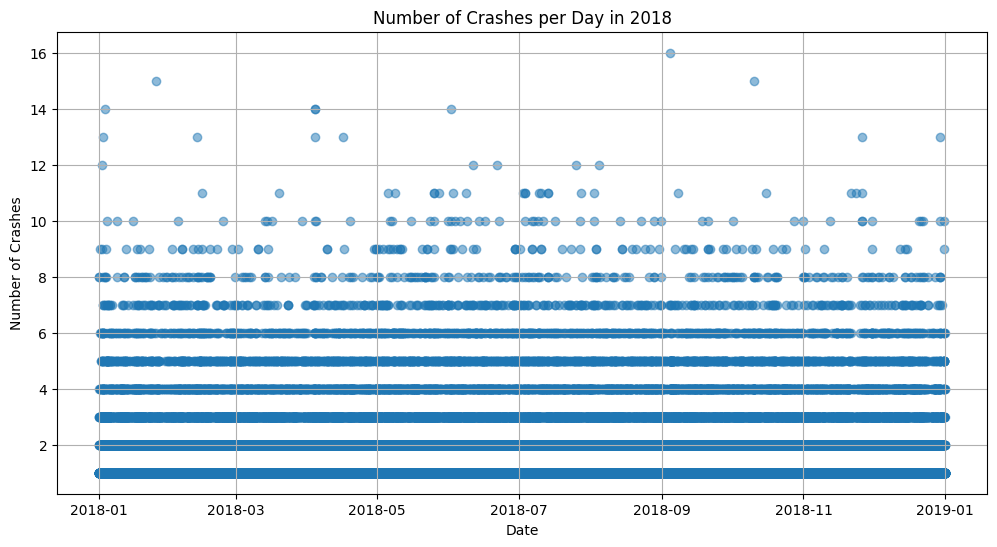

In [7]:
# Scatterplot showing number of accidents per day in 2018
crashes_per_day_2018 = crashes_per_day[crashes_per_day['CRASH_DATE'].dt.year == 2018]

plt.figure(figsize=(12, 6))
plt.scatter(crashes_per_day_2018['CRASH_DATE'], crashes_per_day_2018['CRASH_COUNT'], alpha=0.5)
plt.title('Number of Crashes per Day in 2018')
plt.xlabel('Date')
plt.ylabel('Number of Crashes')
plt.grid(True)
plt.show()




Still too many data points on the graph (118,950 crashes in 2018). Let's break it down  to see what is the best way to view all of this data. Quarters? Months?

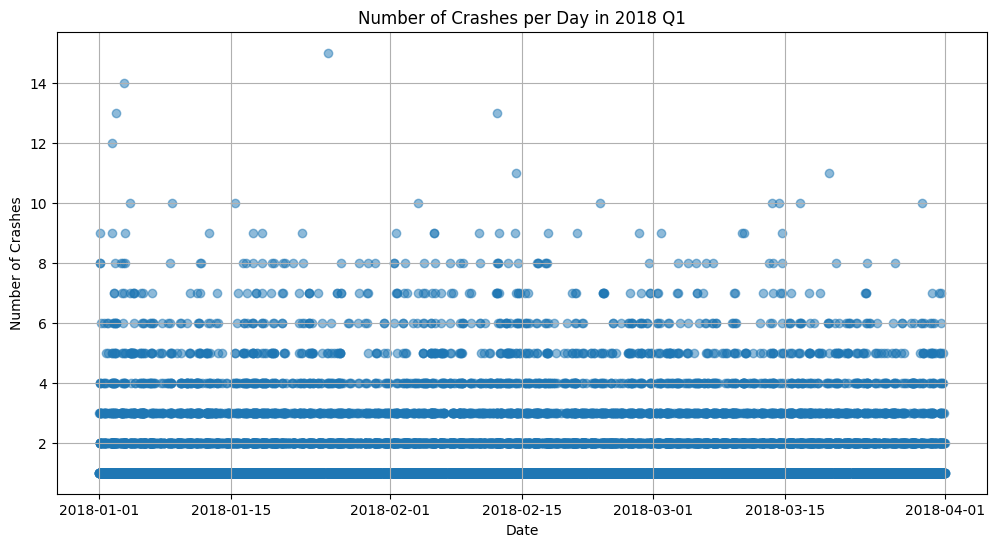

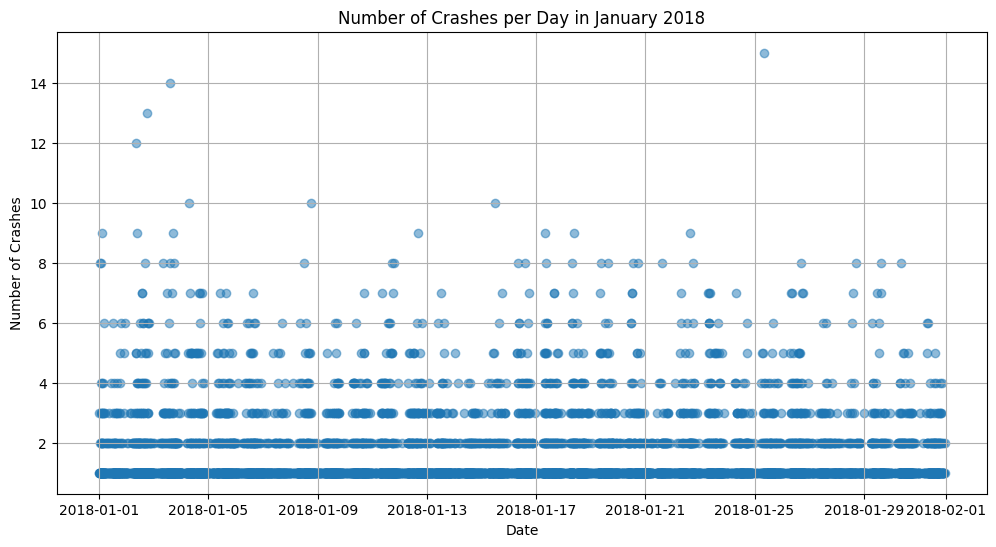

In [8]:
# Scatterplot showing number of accidents per day in 2018 in Q1
crashes_per_day_2018_q1 = crashes_per_day_2018[(crashes_per_day_2018['CRASH_DATE'].dt.month >= 1) & (crashes_per_day_2018['CRASH_DATE'].dt.month <= 3)]

plt.figure(figsize=(12, 6))
plt.scatter(crashes_per_day_2018_q1['CRASH_DATE'], crashes_per_day_2018_q1['CRASH_COUNT'], alpha=0.5)
plt.title('Number of Crashes per Day in 2018 Q1')
plt.xlabel('Date')
plt.ylabel('Number of Crashes')
plt.grid(True)
plt.show()

# Scatterplot showing number of accidents per day in January 2018
crashes_per_day_jan_2018 = crashes_per_day_2018[crashes_per_day_2018['CRASH_DATE'].dt.month == 1]

plt.figure(figsize=(12, 6))
plt.scatter(crashes_per_day_jan_2018['CRASH_DATE'], crashes_per_day_jan_2018['CRASH_COUNT'], alpha=0.5)
plt.title('Number of Crashes per Day in January 2018')
plt.xlabel('Date')
plt.ylabel('Number of Crashes')
plt.grid(True)
plt.show()




We can see the patterns more clearly using the single month data. However, this would be more tedious to create monthly graphs for each of the 7 years of data. How many data points are in both of these time 'buckets'? Is there a better way to represent this data?

In [9]:
# Total number of accidents in 2018 Q1
total_crashes_2018_q1 = crashes_per_day_2018_q1['CRASH_COUNT'].sum()
print(f'Total number of accidents in 2018 Q1: {total_crashes_2018_q1}')

# Total number of accidents in January 2018
total_crashes_jan_2018 = crashes_per_day_jan_2018['CRASH_COUNT'].sum()
print(f'Total number of accidents in January 2018: {total_crashes_jan_2018}')


Total number of accidents in 2018 Q1: 27580
Total number of accidents in January 2018: 9532


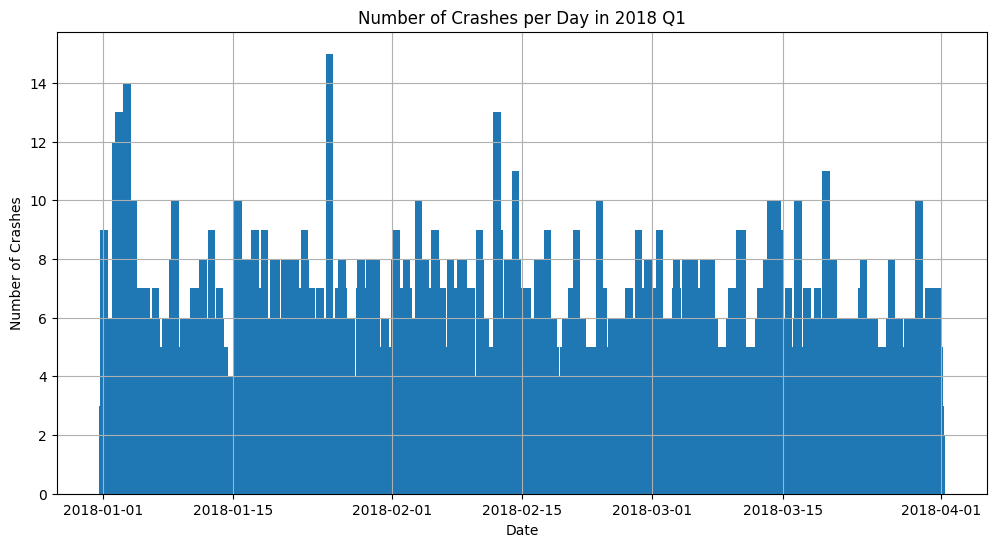

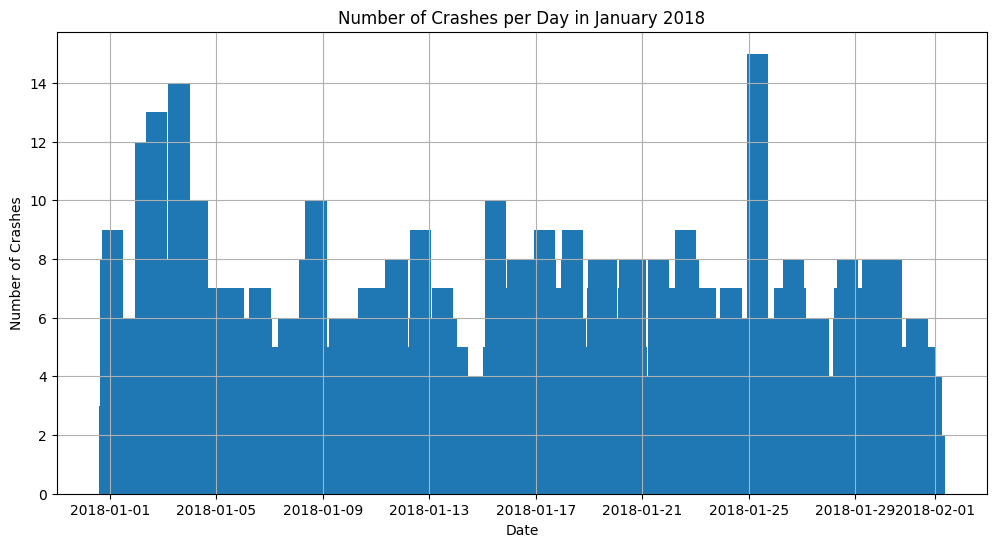

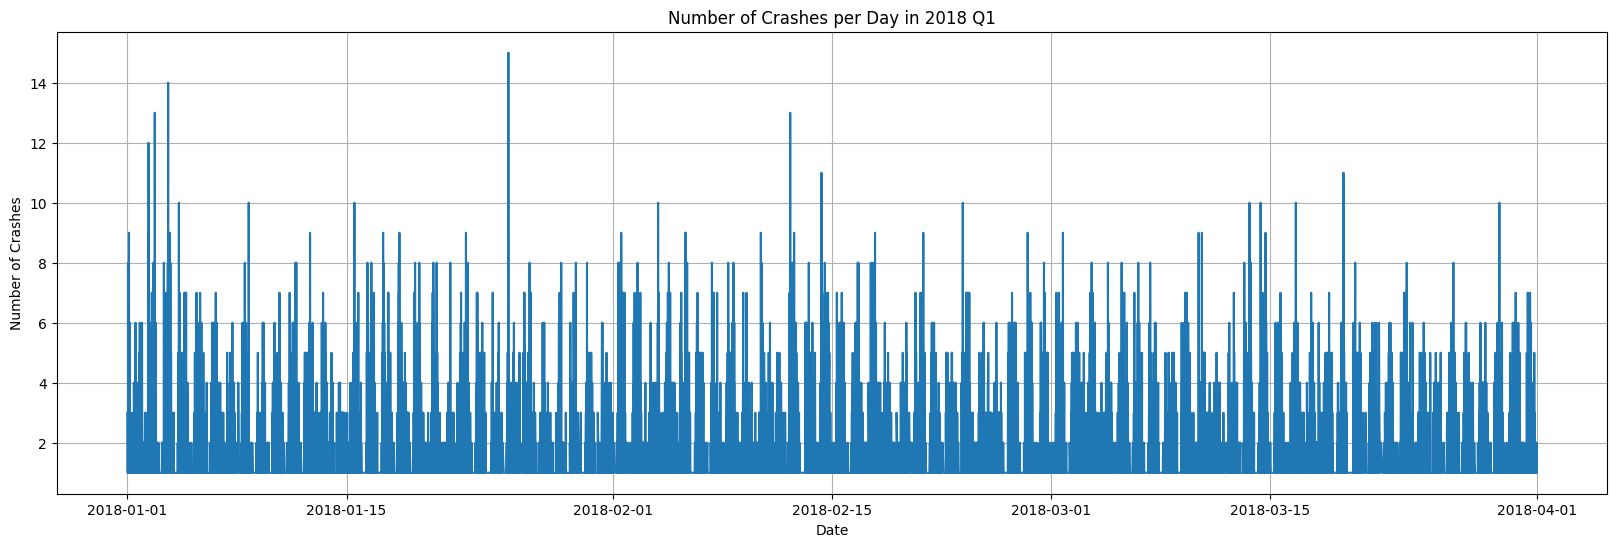

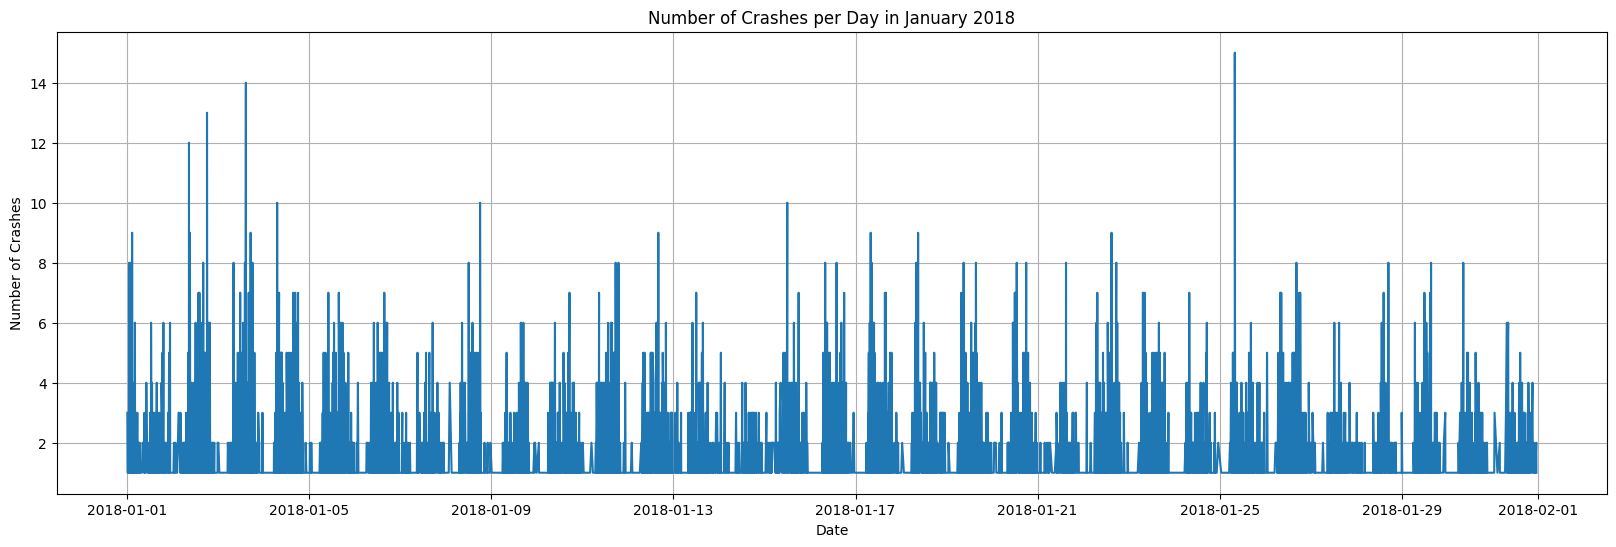

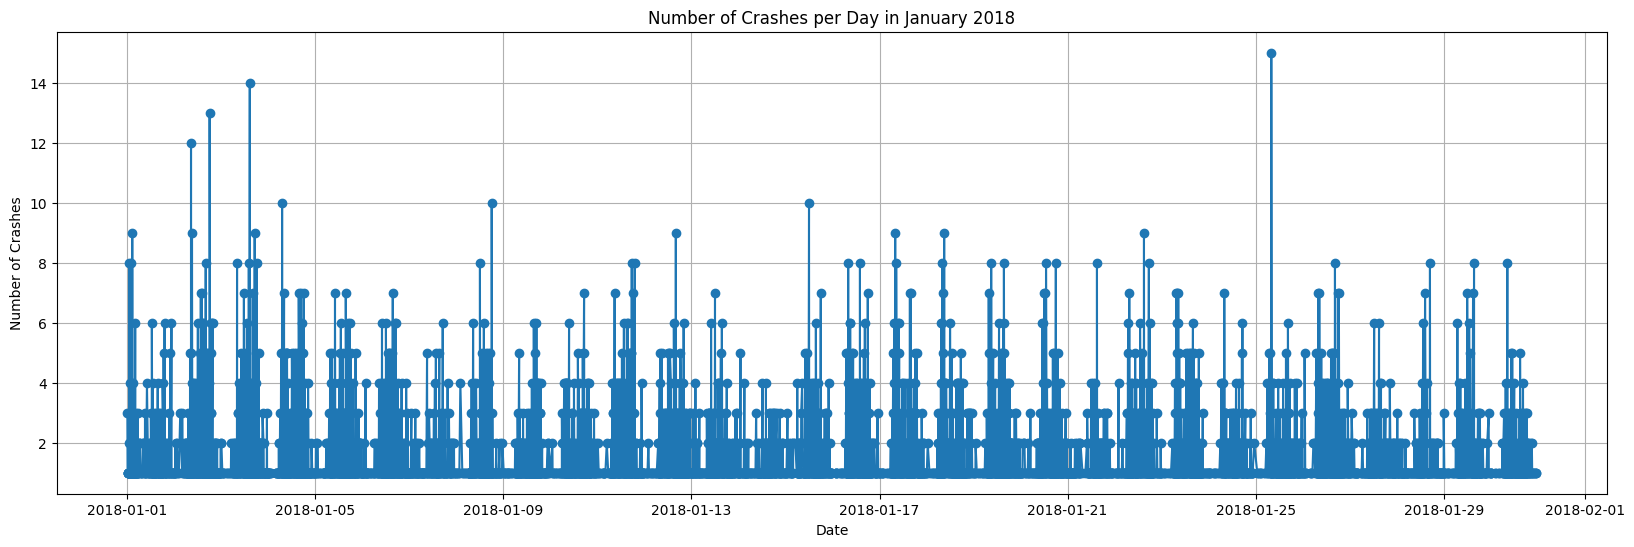

In [10]:
# Create a bar graph shoiwng the number of accidents per day in Q1 2018
plt.figure(figsize=(12, 6))
plt.bar(crashes_per_day_2018_q1['CRASH_DATE'], crashes_per_day_2018_q1['CRASH_COUNT'])
plt.title('Number of Crashes per Day in 2018 Q1')
plt.xlabel('Date')
plt.ylabel('Number of Crashes')
plt.grid(True)
plt.show()

# Create a bar graph showing the number of accidents per day in January 2018
plt.figure(figsize=(12, 6))
plt.bar(crashes_per_day_jan_2018['CRASH_DATE'], crashes_per_day_jan_2018['CRASH_COUNT'])
plt.title('Number of Crashes per Day in January 2018')
plt.xlabel('Date')
plt.ylabel('Number of Crashes')
plt.grid(True)
plt.show()

# Create a line graph showing the number of accidents per day in 2018 Q1
plt.figure(figsize=(20, 6))
plt.plot(crashes_per_day_2018_q1['CRASH_DATE'], crashes_per_day_2018_q1['CRASH_COUNT'])
plt.title('Number of Crashes per Day in 2018 Q1')
plt.xlabel('Date')
plt.ylabel('Number of Crashes')
plt.grid(True)
plt.show()

# Create a line graph showing the number of accidents per day in January 2018
plt.figure(figsize=(20, 6))
plt.plot(crashes_per_day_jan_2018['CRASH_DATE'], crashes_per_day_jan_2018['CRASH_COUNT'])
plt.title('Number of Crashes per Day in January 2018')
plt.xlabel('Date')
plt.ylabel('Number of Crashes')
plt.grid(True)
plt.show()

# Aggregate crashes per day
crashes_per_day = df_interim.groupby('CRASH_DATE').size().reset_index(name='CRASH_COUNT')

# Plot the line graph for crashes in January 2018
crashes_per_day_jan_2018 = crashes_per_day[
    (crashes_per_day['CRASH_DATE'] >= '2018-01-01') & (crashes_per_day['CRASH_DATE'] <= '2018-01-31')
]

plt.figure(figsize=(20, 6))
plt.plot(crashes_per_day_jan_2018['CRASH_DATE'], crashes_per_day_jan_2018['CRASH_COUNT'], marker='o')
plt.title('Number of Crashes per Day in January 2018')
plt.xlabel('Date')
plt.ylabel('Number of Crashes')
plt.grid(True)
plt.show()

The line graph appears to be the best method of displaying the trends in time data. I've also extended the graphs on the x axis so we can see the data a bit better.

We can see a distinct pattern where every few days there are a lot of accidents, and then the number of accidents drops. I think this pattern has to do with days of the week. 

How can we explore the correlation in day of the week with the number of crashes? 

In [20]:
# Group by 'CRASH_DAY_OF_WEEK' and count the number of crashes per day of the week
#crashes_per_day_of_week = df_interim.groupby('CRASH_DAY_OF_WEEK_NAME').size().reset_index(name='CRASH_COUNT')

# Bar graph showing the number of accidents per day of the week in January 2018
crashes_per_day_jan_2018_day_of_week = df_interim[df_interim['CRASH_DATE'].dt.month == 1].groupby('CRASH_DAY_OF_WEEK_NAME').size().reset_index(name='CRASH_COUNT')


plt.figure(figsize=(12, 6))
plt.bar(crashes_per_day_jan_2018_day_of_week['CRASH_DAY_OF_WEEK'], crashes_per_day_jan_2018_day_of_week['CRASH_COUNT'])
plt.title('Number of Crashes per Day of the Week in January 2018')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crashes')
plt.grid(True)
plt.show()


KeyError: 'CRASH_DAY_OF_WEEK_NAME'

In [5]:
df_interim['dt'] = df_interim['CRASH_DATE'].diff(periods=1)

df_interim.head()


#plt.plot(df_interim['dt'])


,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION,CRASH_YEAR,CRASH_DAY_OF_WEEK_NAME,dt
0,23a79931ef555d54118f64dc9be2cf2dbf59636ce253f7...,NaN,2023-09-05 19:05:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DUSK,ANGLE,"FIVE POINT, OR MORE",...,0.0,19,3,9,NaN,NaN,NaN,2023,Tuesday,NaT
1,2675c13fd0f474d730a5b780968b3cafc7c12d7adb661f...,NaN,2023-09-22 18:45:00,50,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,...,0.0,18,6,9,NaN,NaN,NaN,2023,Friday,16 days 23:40:00
2,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,NaN,2023-07-29 14:45:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,14,7,7,41.85412,-87.665902,POINT (-87.665902342962 41.854120262952),2023,Saturday,-56 days +20:00:00
3,7ebf015016f83d09b321afd671a836d6b148330535d5df...,NaN,2023-08-09 23:00:00,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,NOT DIVIDED,...,0.0,23,4,8,NaN,NaN,NaN,2023,Wednesday,11 days 08:15:00
4,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,NaN,2023-08-18 12:50:00,15,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,...,0.0,12,6,8,NaN,NaN,NaN,2023,Friday,8 days 13:50:00
